In [13]:
import numpy as np
import matplotlib.pyplot as plt

import numpy.linalg as NLA 
import scipy.linalg as SLA

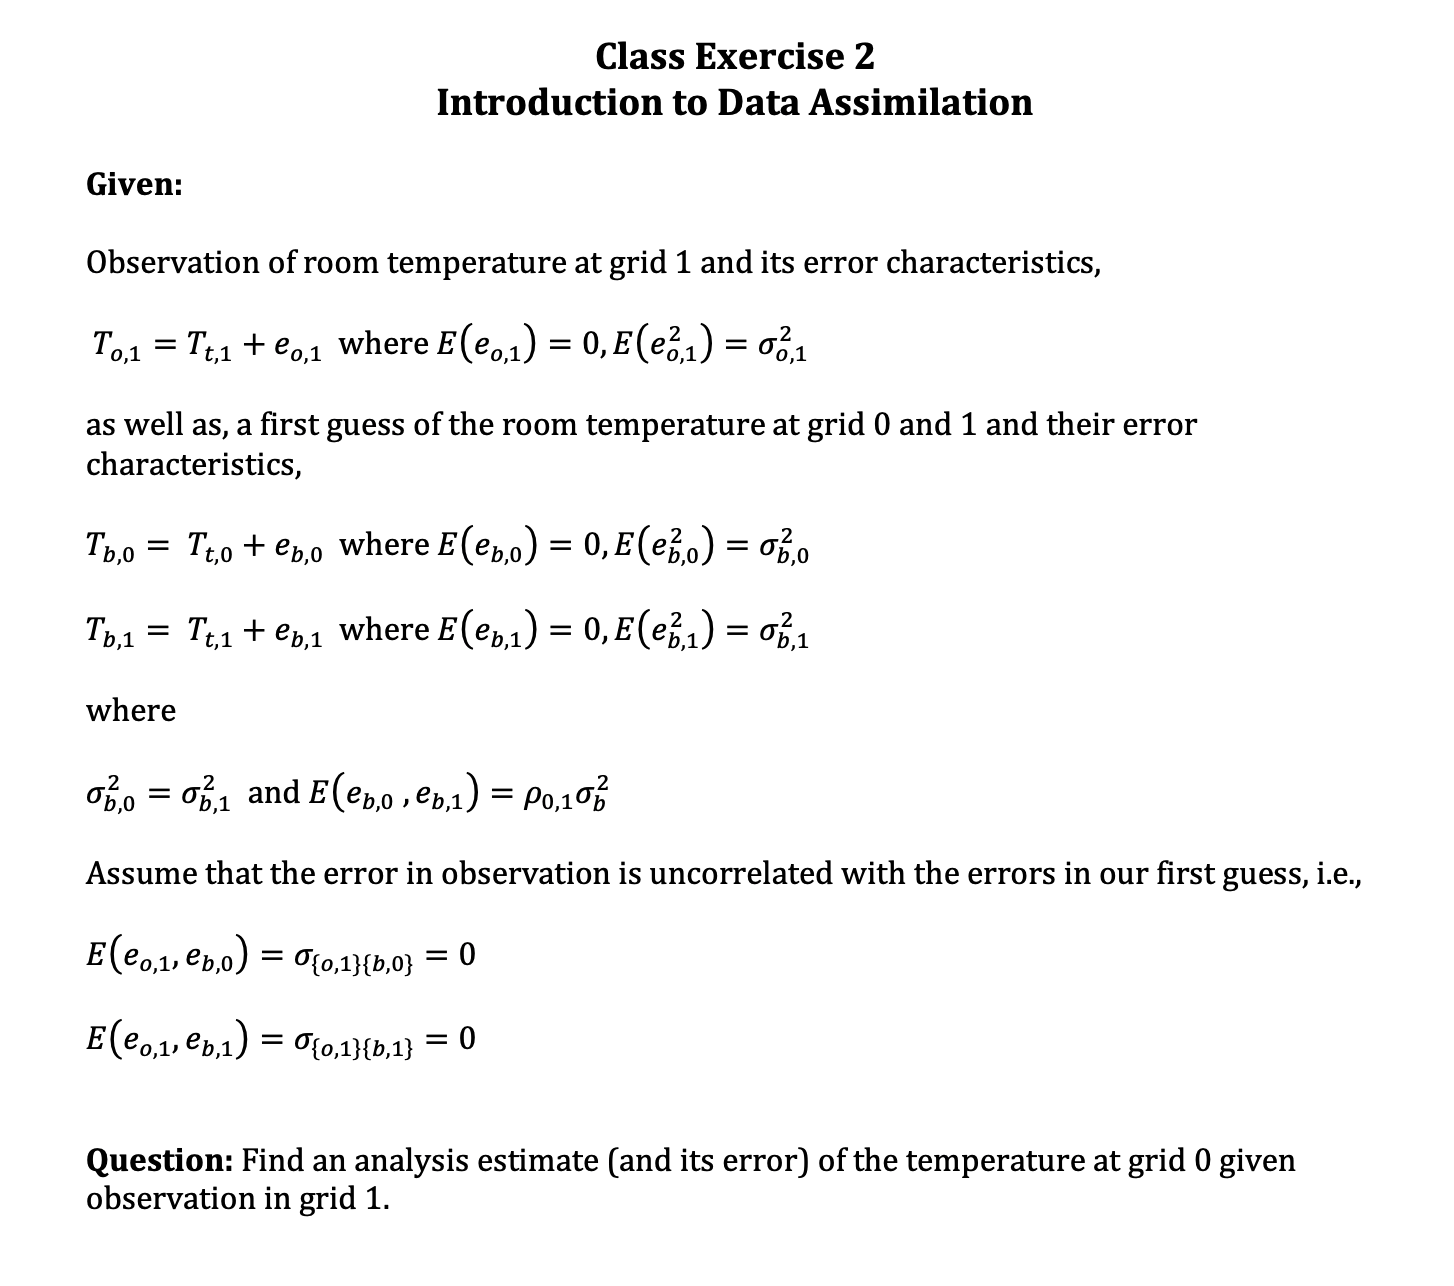

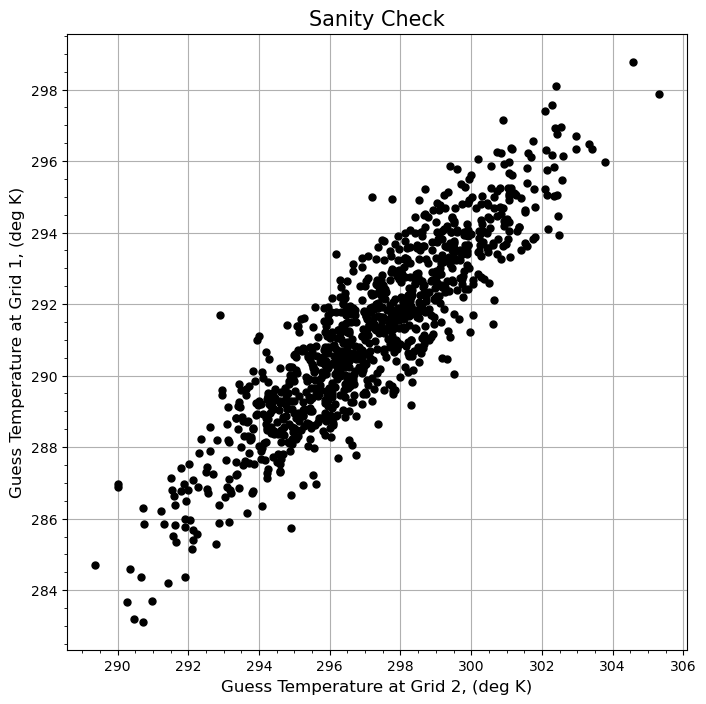

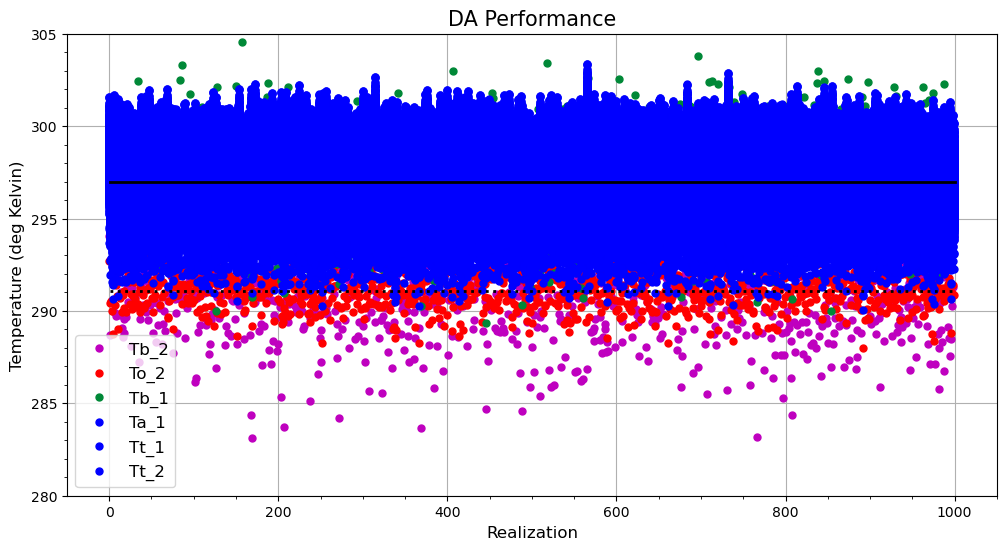

root mean square errors for Tb_1 and Ta_1
[2.52283154352818, 1.3882737652655848]
sample Tb_1, sample Ta_1, Tt_1
[301.0608634091581, 300.00275388548624, 297]
std deviation of error estimates, sigmab, sigmaba, sigmao, sigmaa_1, rhob_12, rhob_12a
[2.5, 2.5, 1.0, 1.3732355450063782, 0.9, 0.9]


In [25]:
# Set Tt_1 & Tt_2
Tt_1 = 297  # degrees Kelvin
Tt_2 = 0.98 * Tt_1

# Set eb_1 and eb_2
sigmab = 2.5  # standard deviation of eb_1 = standard deviation of eb_2
sigmao = 1.0  # standard deviation of eo_1
rhob_12 = 0.9  # correlation of eb_1 and eb_2

nsamples = 1000  # number of samples (realization)

# initialize seed (for reproducibility purposes)
np.random.seed(1)
# generate nsamples of eb_1 and eb_2 and er_2 given their characteristics
eo_2 = 0 + sigmao * np.random.randn(nsamples, 1)

mu = np.array([0,0])
Sigma = [[sigmab**2, rhob_12 * sigmab**2], [rhob_12 * sigmab**2, sigmab**2]]
R = SLA.cholesky(Sigma, lower=False)

np.random.seed(1)
z = np.tile(mu,(1000,1)) + (np.random.randn(nsamples,2) @ R)
eb_1 = z[:, 0]
eb_2 = z[:, 1]

# generate nsamples of To_2, Tb_1 and Tb_2
To_2 = Tt_2 + eo_2
Tb_1 = Tt_1 + eb_1
Tb_2 = Tt_2 + eb_2

# Estimate the true temperature in the room Ta_1 as a linear combination
# of 2 pieces of information
alpha = sigmao**2 / sigmab**2
w1 = rhob_12 / (1 + alpha)
Ta_1 = Tb_1 + w1 * (To_2 - Tb_2)
sigmaa_1_square = sigmab**2 * (1 - (rhob_12**2) / (1 + alpha))
sigmaa_1 = np.sqrt(sigmaa_1_square)

# now assume that our knowledge of rhob_12 is wrong
infa = 1  # 0.5
rhob_12a = rhob_12 * infa

# now assume that our knowledge of sigmab is wrong
infb = 1
sigmaba = np.sqrt(infb) * sigmab

alpha = sigmao**2 / sigmaba**2
w1 = rhob_12a / (1 + alpha)
Ta_1 = Tb_1 + w1 * (To_2 - Tb_2)
sigmaa_1_square = sigmaba**2 * (1 - (rhob_12a**2) / (1 + alpha))
sigmaa_1 = np.sqrt(sigmaa_1_square)

print('==================================================================')

# Diagnostics
plt.figure(1, figsize=(8, 8))
plt.plot(Tb_1, Tb_2, 'k.', markersize=10)
plt.ylabel('Guess Temperature at Grid 1, (deg K)', fontsize=12)
plt.xlabel('Guess Temperature at Grid 2, (deg K)', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.minorticks_on()
plt.title('Sanity Check', fontsize=15)
plt.show()

plt.figure(2, figsize=(12, 6))
colors = np.array([(0, 136, 55), (202, 0, 32), (56, 108, 176)]) / 255.0
plt.plot(Tb_2, 'm.', markersize=10)
plt.plot(To_2, 'r.', markersize=10)
plt.plot(Tb_1, '.', color=colors[0], markersize=10)
plt.plot(Ta_1, 'b.', markersize=10)
plt.plot(np.arange(1, len(Ta_1) + 1), Tt_1 * np.ones(len(Ta_1)), 'k-', linewidth=2)
plt.plot(np.arange(1, len(Ta_1) + 1), Tt_2 * np.ones(len(Ta_1)), 'k:', linewidth=2)
plt.ylim([280, 305])
plt.grid(True)
plt.xlabel('Realization', fontsize=12)
plt.ylabel('Temperature (deg Kelvin)', fontsize=12)
plt.legend(['Tb_2', 'To_2', 'Tb_1', 'Ta_1', 'Tt_1', 'Tt_2'], loc='best', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.minorticks_on()
plt.title('DA Performance', fontsize=15)
plt.show()

# Check if our estimate is more accurate
print('root mean square errors for Tb_1 and Ta_1')
print([np.sqrt(np.mean((Tb_1 - Tt_1)**2)), np.sqrt(np.mean((Ta_1 - Tt_1)**2))])
print('sample Tb_1, sample Ta_1, Tt_1')
print([Tb_1[0], Ta_1.ravel()[0], Tt_1])
print('std deviation of error estimates, sigmab, sigmaba, sigmao, sigmaa_1, rhob_12, rhob_12a')
print([sigmab, sigmaba, sigmao, sigmaa_1, rhob_12, rhob_12a])
